# Figuring out Linear Regression
We all know from our secondary school maths classes the equation for gwnerating a straight line in a graph.
$$y = ax + b$$
Where $a$ represents the gradient of the line and $b$ represents the offset. But what if we have a series of points and need work backwards to figure out what these two coefficients need to be in order to fit the points we have?

Also, what if these points come from a observed measurements and therefore had some noise in them which meant that they don't fit exactly into a straight line?

This is the job of a process called Linear Regression and this is the first of a series of blogs that looks at how this reverse fitting process can be done in code.

In order to split the problem down into easier chunks, I'm going to start but taking each coefficient one at a time and then combine things together to give an overall solution in code.

## Step 1 - Calculating the gradient of a line
We start by looking at the gradient of the line. What we're going to do is draw a series of imaginary lines through the data and try to find one that best fits the data we have. Once we have found this, we can extract the gradient from the imaginary line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random

We start by creating our test data. In real life, we'd be getting this from some kind of data source, but for our purploses here we'll create some. That way we'll know if the code is working correctly.

The constant `INPUT_GRADIENT` holds our test data gradient. As we are starting with the the gradient only, our offset will be zero. `X_values` holds our X axis values and `Y_targets` holds the Y values of the test data.

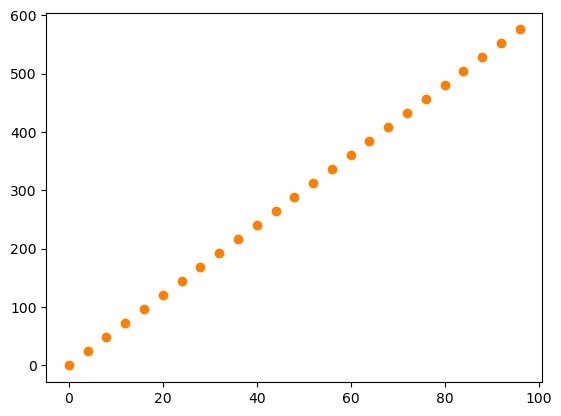

In [2]:
INPUT_GRADIENT = 6

X_values = np.arange(start=0, stop=100, step=4)
Y_targets = X_values * INPUT_GRADIENT

plt.scatter(X_values, Y_targets, c=[[1, 0.5, 0]])
plt.show()

Having test data that is so precise isn't particularly interesting, we want to make tings a bit more fun so the next thing to do is to introduce a bit of random noise.

We do this using numpy's random.normal function as this will create noise using a normal (Guassian) distribution. This kind of distribution is found a lot in nature so it's probably representative of most noise that will creep into measurements.

Having generated the noise, we add it to the Y values to create the data we'll use to attempt the fit.

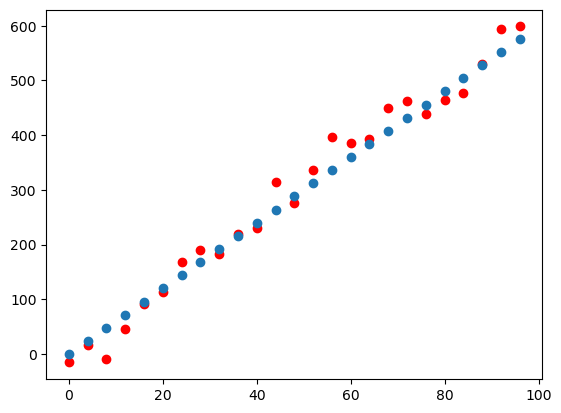

In [3]:
# create the noise to apply to the points
noise = np.random.normal(loc=0.0, scale=30.0, size=X_values.size)
Y_actuals = np.add(Y_targets, noise)

# plot the noisy vs the actual points
plt.scatter(X_values, Y_actuals, color=[1, 0, 0])
plt.scatter(X_values, Y_targets)
plt.show()


Having generated our test data, we're now going to attempt to fit a gradient to it. 

The first, simple approach we're going to adopt is to try a load of gradients and see which one fits the data best. So how do we know how good a gradient fit is? 

The way we do this is, for each of the values in our test data, we generate a new y value based on the gradient we're testing for. We then look at each of these y values and compare them to the y values in our test data. We can then calculate the Mean Square Error of the generated y values agains the test y values which will tell us how close we were.
$$MSE = \frac{1}{n}\sum_{x=0}^{n}(Y_{x}-\hat{Y_{x}})^2$$
Where $n$ is the number of Y values, $\hat{Y_{x}}$ is the Y value predicted by the test gradient and $Y_{x}$ is the y value we're trying to fit.

In [4]:
# Holds the lowest error value found while assessing gradients
min_err = -1

# holds the gradient with the lowest error found
estimated_gradient = 0

# holds the number of Y values to fit
N = Y_actuals.size

# loop through a range of gradients
for gradient_guess in range(-8, 8):

  # reset the Mean Squared Error for this gradient
  mse = 0

  # For each value in the test data
  for i in range(N):

    # get hold of the values for x, the y value in the test data
    # and the y value we would predict from the gradient we're trying
    x = X_values[i]
    actual_y = Y_actuals[i]
    predicted_y = x * gradient_guess

    # calculate the error for this Y value
    e = (actual_y - predicted_y) ** 2
    mse += e

  mse /= N
  print(f'Gradient {gradient_guess} produced an MSE of {mse}')
  if min_err == -1 or mse < min_err:
    min_err = mse
    estimated_gradient = gradient_guess

print(f'Gradient found: {estimated_gradient}, min_err: {min_err}')


Gradient -8 produced an MSE of 631910.3459652737
Gradient -7 produced an MSE of 546062.084110784
Gradient -6 produced an MSE of 466485.822256294
Gradient -5 produced an MSE of 393181.56040180416
Gradient -4 produced an MSE of 326149.2985473143
Gradient -3 produced an MSE of 265389.03669282445
Gradient -2 produced an MSE of 210900.7748383346
Gradient -1 produced an MSE of 162684.51298384467
Gradient 0 produced an MSE of 120740.25112935477
Gradient 1 produced an MSE of 85067.98927486493
Gradient 2 produced an MSE of 55667.72742037504
Gradient 3 produced an MSE of 32539.46556588515
Gradient 4 produced an MSE of 15683.203711395274
Gradient 5 produced an MSE of 5098.941856905393
Gradient 6 produced an MSE of 786.6800024155132
Gradient 7 produced an MSE of 2746.418147925633
Gradient found: 6, min_err: 786.6800024155132


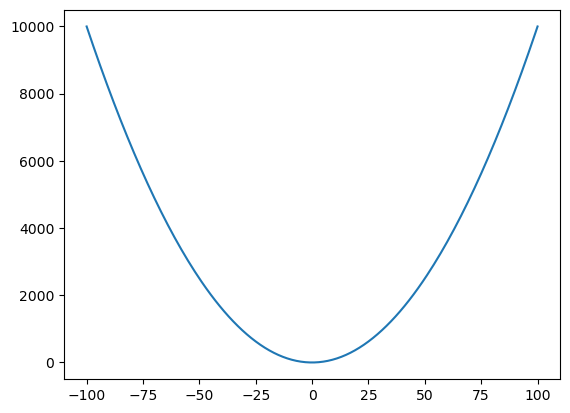

In [5]:
# plot the loss gradient curve
gc = np.array([[x for x in range(-100, 101)],[(x ** 2) for x in range(-100, 101)]])
plt.plot(gc[0], gc[1])

Initial gradient guess: 20
Gradient found: 6.1283780591123325 Accuracy: 87.2%


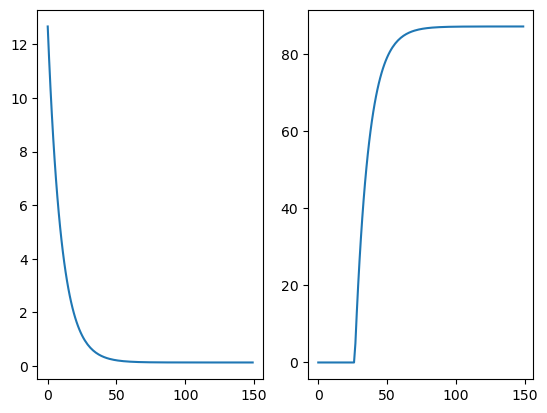

In [6]:
from logging import logMultiprocessing
# Holds the lowest error value found while assessing gradients
min_err = -1

# holds the number of Y values to fit
N = Y_actuals.size

# create a random guess for the gradient
gradient_guess = random.randint(5, 50)
print(f'Initial gradient guess: {gradient_guess}')

# define the number of iterations we'll use to get to the answer
NUM_EPOCHS = 150
LEARNING_RATE = 0.001

# these arrays will help us keep track of the data in each epoch 
# so we can plot it later
loss = np.zeros(NUM_EPOCHS)
accuracy = np.zeros(NUM_EPOCHS)

# loop through a range of gradients
for epoch in range(NUM_EPOCHS):

  # reset the Mean Squared Error for this gradient
  mse = 0
  grads = np.zeros((N))
  e_squared = np.zeros((N))

  # For each value in the test data
  for i in range(N):

    # get hold of the values for x, the y value in the test data
    # and the y value we would predict from the gradient we're trying
    x = X_values[i]
    actual_y = Y_actuals[i]
    predicted_y = x * gradient_guess

    # calculate the error for this Y value
    e = (actual_y - predicted_y)

    # store the error squared so we can calculate the mean
    e_squared[i] = e ** 2

    # calculate the gradient of the error
    grads[i] = (2 * e)

  # calculate the mean squared error    
  mse  = np.mean(e_squared)

  # calculate the mean gradient of the errors
  mean_gradient = np.mean(grads)

  # update the predicted gradient
  gradient_guess += (mean_gradient * LEARNING_RATE)

  # store the loss so we can plot it later
  loss[epoch] = abs(gradient_guess - INPUT_GRADIENT)
  error_rate = min(abs(gradient_guess - INPUT_GRADIENT) * 100, 100)
  accuracy[epoch] = 100 - error_rate

print(f'Gradient found: {gradient_guess} Accuracy: {accuracy[-1]:.1f}%')

# plot the loss and accuracy curves
loss_plt = plt.subplot(1, 2, 1)
loss_plt.plot(loss)
acc_plt = plt.subplot(1, 2, 2)
acc_plt.plot(accuracy)
plt.show()
